In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\yuvar\Downloads\archive (13)\vehicles.csv")

In [3]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
data.drop(["id","url","region_url","image_url","description","posting_date","county","state","lat","long","size","VIN"], axis=1, inplace=True)

In [6]:
data.isnull().sum()/data.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

In [7]:
data = data.dropna(subset=['year', 'odometer', 'manufacturer', 'model',"title_status"])

In [8]:
data.isnull().sum()/data.shape[0]*100

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       40.832421
cylinders       41.565786
fuel             0.398768
odometer         0.000000
title_status     0.000000
transmission     0.396221
drive           29.551832
type            21.097502
paint_color     28.801660
dtype: float64

In [9]:
data.duplicated().sum()

51653

In [10]:
data=data.drop_duplicates()

In [11]:
data.isnull().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition       129913
cylinders       138446
fuel              1201
odometer             0
title_status         0
transmission      1279
drive           100445
type             70343
paint_color      94575
dtype: int64

In [12]:
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [13]:
data["condition"].fillna(data["condition"].mode()[0],inplace=True)
data["cylinders"].fillna(data["cylinders"].mode()[0],inplace=True)
data["fuel"].fillna(data["fuel"].mode()[0],inplace=True)
data["transmission"].fillna(data["transmission"].mode()[0],inplace=True)
data["drive"].fillna(data["drive"].mode()[0],inplace=True)
data["type"].fillna(data["type"].mode()[0],inplace=True)
data["paint_color"].fillna(data["paint_color"].mode()[0],inplace=True)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341057 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        341057 non-null  object 
 1   price         341057 non-null  int64  
 2   year          341057 non-null  float64
 3   manufacturer  341057 non-null  object 
 4   model         341057 non-null  object 
 5   condition     341057 non-null  object 
 6   cylinders     341057 non-null  object 
 7   fuel          341057 non-null  object 
 8   odometer      341057 non-null  float64
 9   title_status  341057 non-null  object 
 10  transmission  341057 non-null  object 
 11  drive         341057 non-null  object 
 12  type          341057 non-null  object 
 13  paint_color   341057 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 39.0+ MB


In [15]:
data.shape

(341057, 14)

In [16]:
data["year"]=data["year"].astype(int)
data["odometer"]=data["odometer"].astype(int)

In [17]:
data.corr()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,year,odometer
price,1.000000,-0.004918,0.001009
year,-0.004918,1.000000,-0.183758
odometer,0.001009,-0.183758,1.000000


In [18]:
data.describe()

,price,year,odometer
count,3.410570e+05,341057.000000,3.410570e+05
mean,7.091124e+04,2011.495738,9.512073e+04
std,1.223635e+07,8.922981,1.862857e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.593100e+04
50%,1.469700e+04,2014.000000,8.355200e+04
75%,2.699000e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [19]:
price_percentile25 = data['price'].quantile(0.25)
price_percentile75 = data['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [21]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = data['price'].quantile(0.15)

In [29]:
data = data[(data['price'] < price_upper_limit) & (data['price'] > price_lower_limit)]

In [30]:
odometer_percentile75 = data['odometer'].quantile(0.75)
odometer_percentile25 = data['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = data['odometer'].quantile(0.05)

In [31]:
data= new_data[(new_data['odometer'] < odometer_upper_limit) & (new_data['odometer'] > odometer_lower_limit)]

In [32]:
data.shape

(267904, 14)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

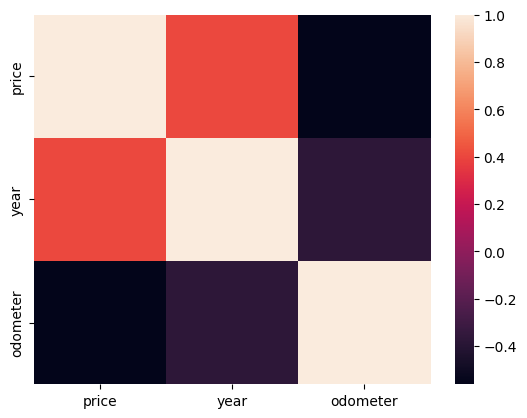

In [33]:
sns.heatmap(data.corr())

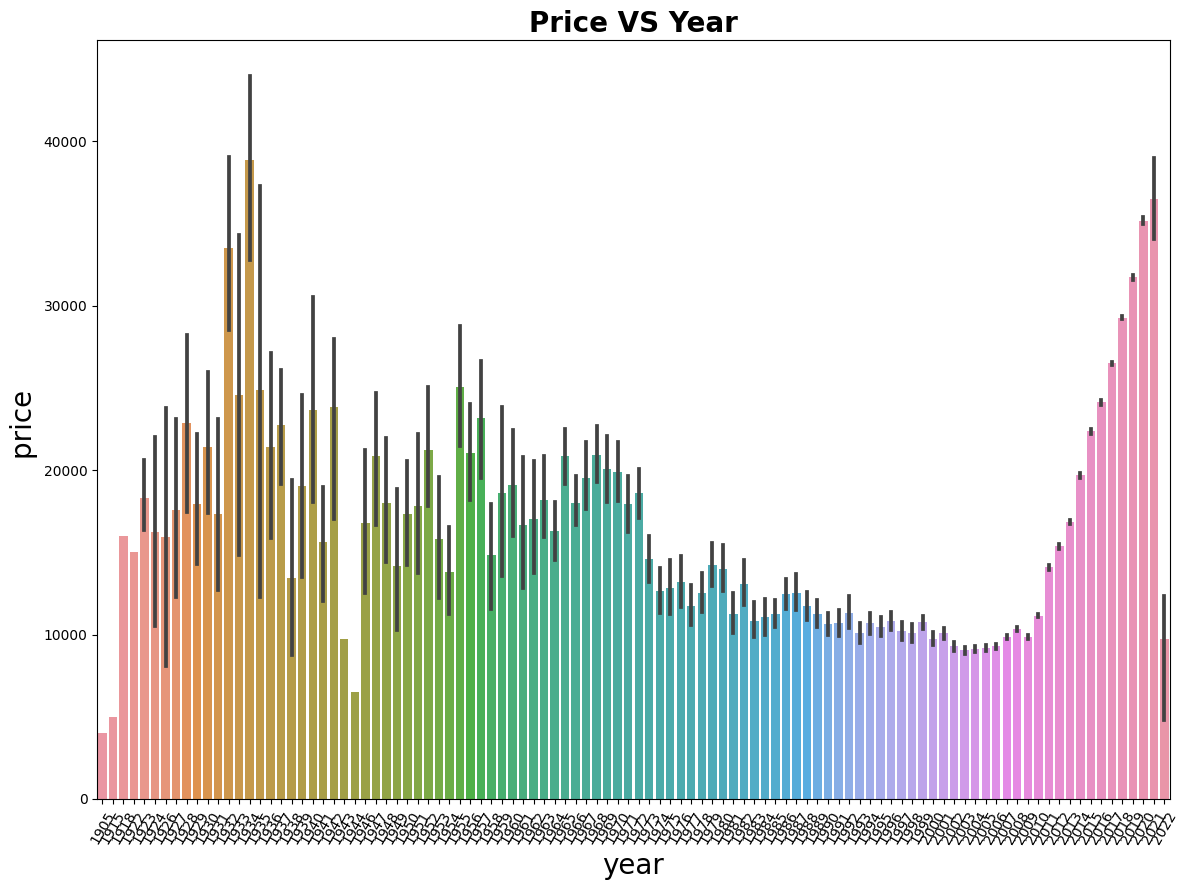

In [34]:
plt.figure(figsize =(12,9))
sns.barplot(y=data["price"],x=data["year"])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

In [35]:
new_data = data[data['year'] > 1996]
new_data.shape

(259181, 14)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


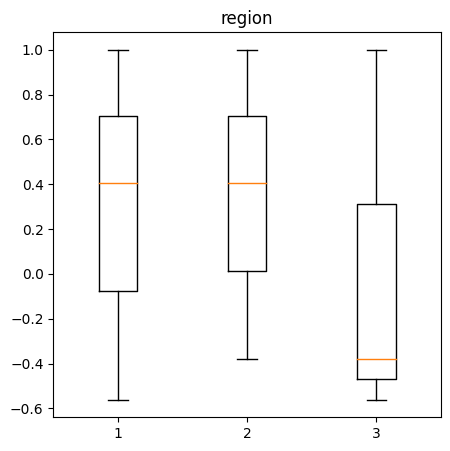

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


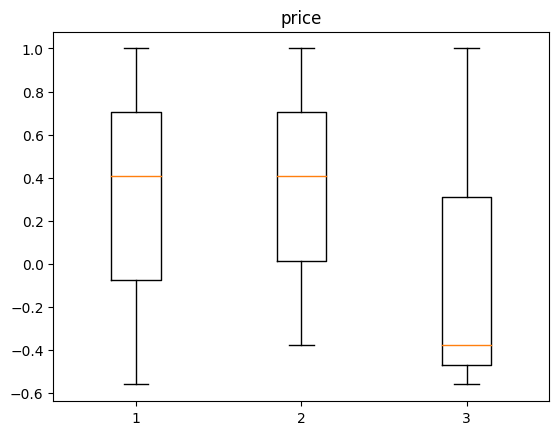

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


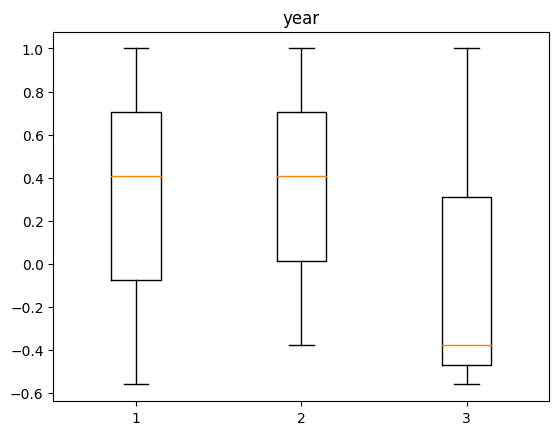

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


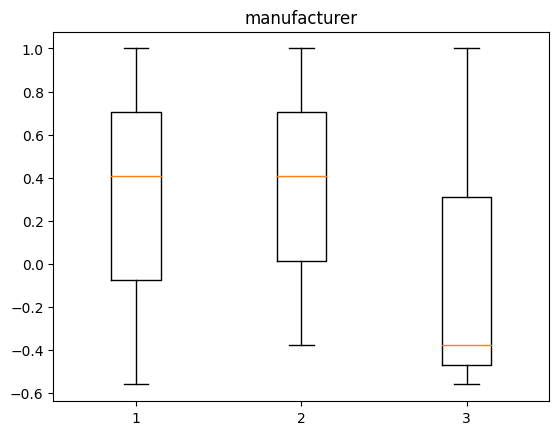

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


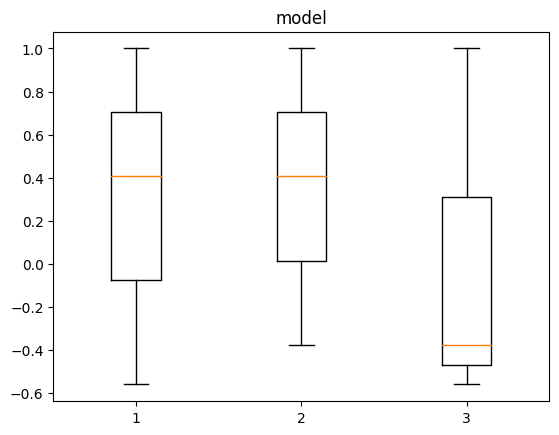

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


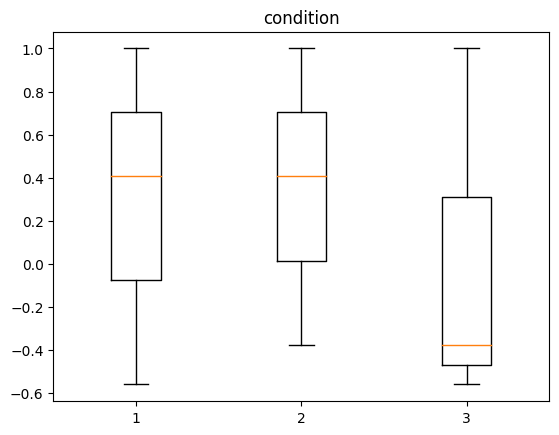

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


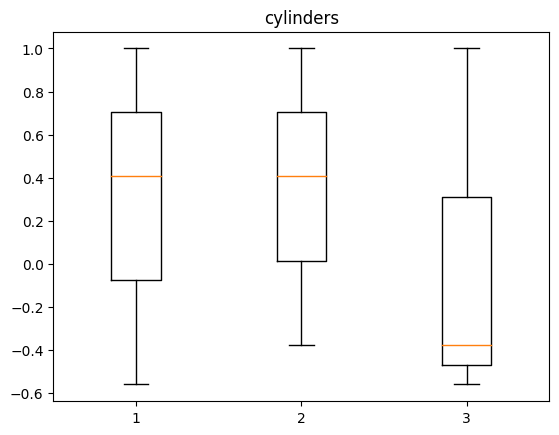

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


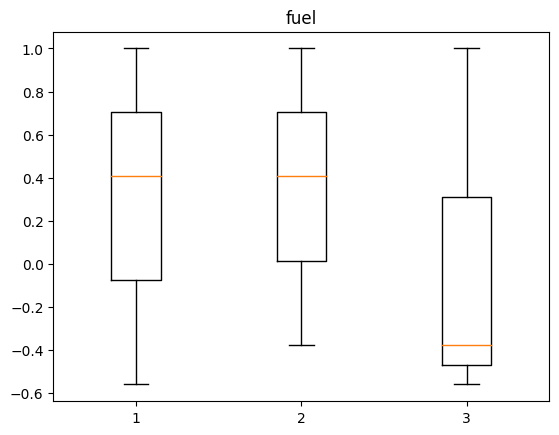

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


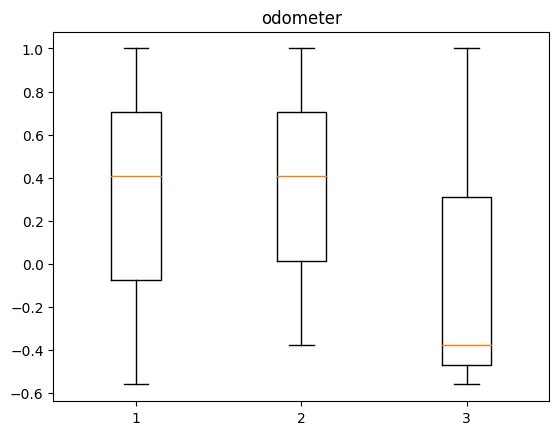

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


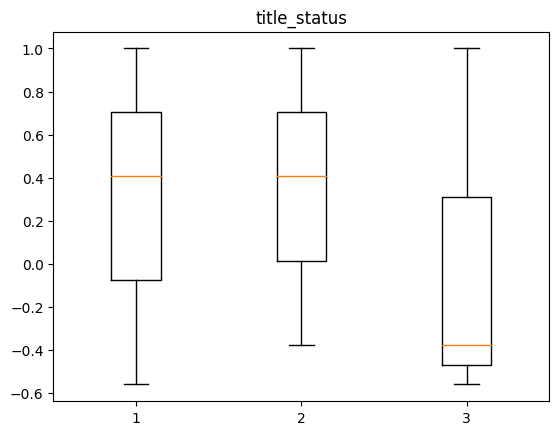

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


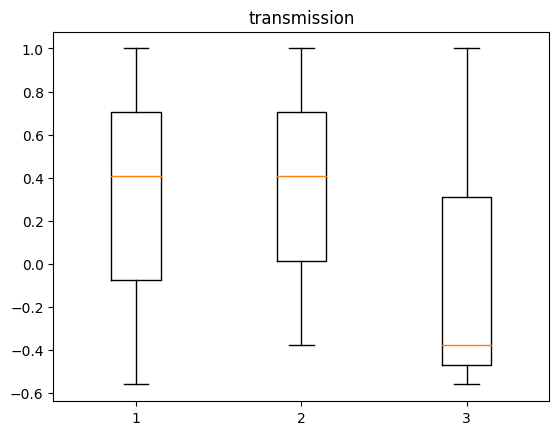

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


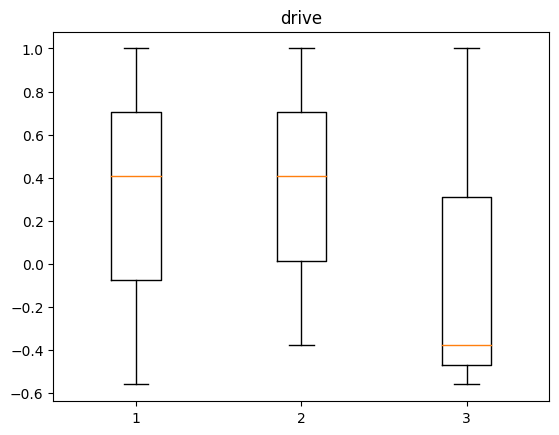

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


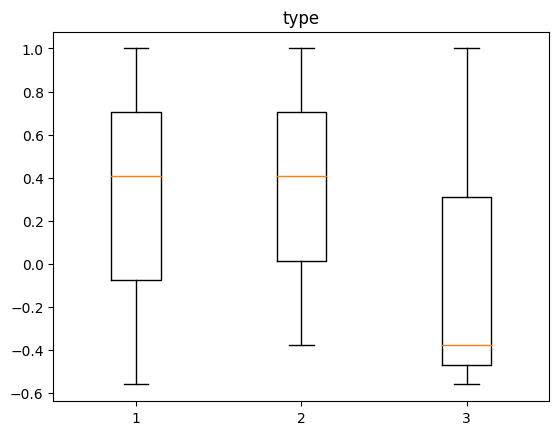

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\1895015607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.boxplot(data.corr())


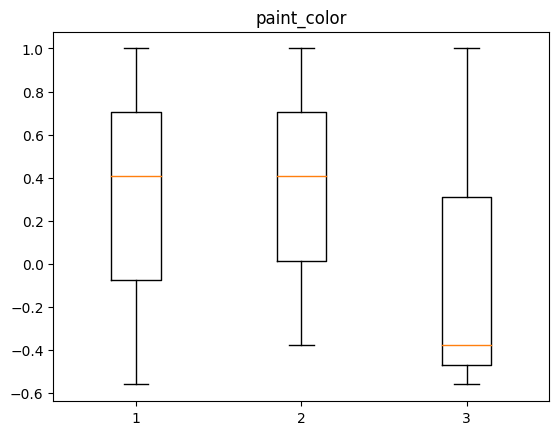

In [36]:
plt.figure(figsize=(5,5))
for i in data:
    plt.boxplot(data.corr())
    plt.title(i)
    plt.show()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_10052\2971264250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


<Axes: xlabel='price', ylabel='Density'>

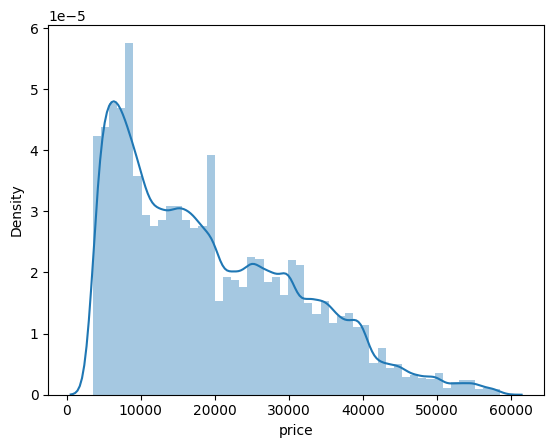

In [38]:
sns.distplot(data.price)

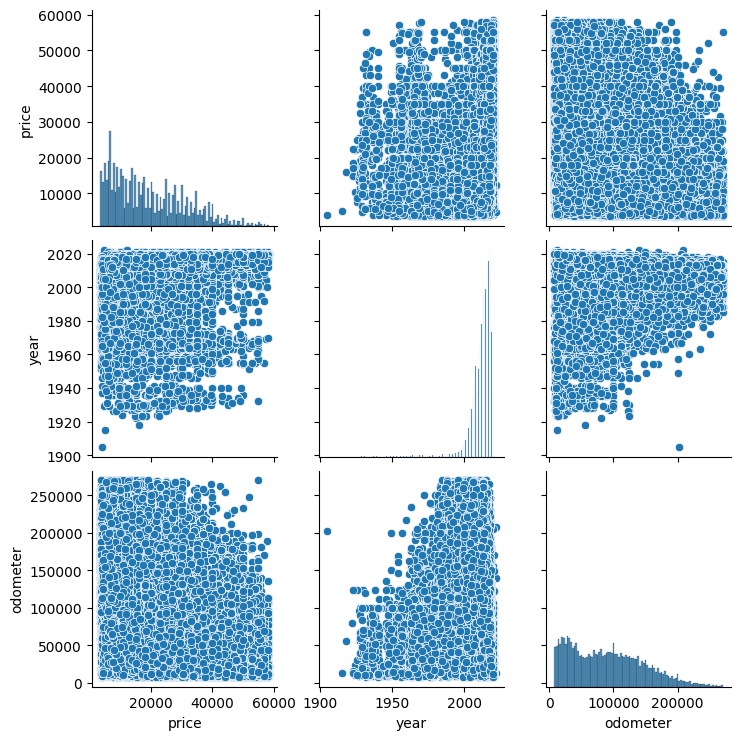

In [39]:
sns.pairplot(data)


In [40]:
from sklearn.preprocessing  import LabelEncoder

In [41]:
le=LabelEncoder()

In [45]:
x=["manufacturer","model","condition","cylinders","fuel","title_status","transmission","drive","type","paint_color","region"]
for i in x:
    data[i]=le.fit_transform(data[i])
    

In [75]:
import pickle
pickle.dump(le,open("carcolumn.pkl","wb"))

In [54]:
x=data.iloc[:,[1]].values
y=data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].values

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
x_train.shape

(214323, 1)

In [61]:
y_train.shape

(214323, 13)

In [62]:
from sklearn.linear_model import LinearRegression

In [67]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [68]:
lr_pred

array([[   0.        , 2016.86697899,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 2011.39788113,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 2009.18949202,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        , 2008.78527193,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 2016.4897069 ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 2011.63906578,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [69]:
y_test

array([[   0, 2016,    0, ...,    0,    0,    0],
       [   0, 2016,    0, ...,    0,    0,    0],
       [   0, 2014,    0, ...,    0,    0,    0],
       ...,
       [   0, 2008,    0, ...,    0,    0,    0],
       [   0, 2018,    0, ...,    0,    0,    0],
       [   0, 2017,    0, ...,    0,    0,    0]])

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_pred)

0.8828840071221354

In [76]:
pickle.dump(lr,open("Usedcarsales.pkl","wb"))